In [1]:
#Are there certain stocks, sectors, or industry’s that are more sensitive to news sentiment?
import pandas as pd

# Read your CSV (replace with the correct path)
df = pd.read_csv('/content/labeled_financial_news_2M_clean.csv')

# Extract unique symbols
unique_symbols = df['stock_symbol'].unique()

print("Number of unique symbols:", len(unique_symbols))
# Print each symbol on its own line
for sym in unique_symbols:
    print(sym)


Number of unique symbols: 1959
A
AA
AAC
AADR
AAL
AAMC
AAME
AAN
AAOI
AAON
AAP
AAPL
AAU
AAV
AAVL
AAWW
AAXJ
AB
ABAC
ABAX
ABB
ABBV
ABC
ABCB
ABCD
ABCO
ABCW
ABDC
ABEV
ABG
ABGB
ABIO
ABM
ABMD
ABR
ABTL
ABX
ABY
ACAD
ACAS
ACAT
ACC
ACCO
ACCU
ACE
ACET
ACFC
ACFN
ACG
ACGL
ACH
ACHC
ACHN
ACIW
ACLS
ACM
ACMP
ACN
ACNB
ACOR
ACP
ACPW
ACRE
ACRX
ACSF
ACST
ACT
ACTA
ACTG
ACTS
ACU
ACUR
ACWI
ACWV
ACWX
ACXM
ACY
ADAT
ADBE
ADC
ADEP
ADES
ADGE
ADHD
ADI
ADK
ADM
ADMA
ADMP
ADMS
ADNC
ADP
ADPT
ADRA
ADRD
ADRE
ADRU
ADS
ADSK
ADT
ADTN
ADVS
ADX
ADXS
ADZ
AE
AEB
AEC
AEE
AEG
AEGN
AEGR
AEHR
AEIS
AEL
AEM
AEO
AEPI
AER
AERI
AES
AET
AETI
AEY
AEZS
AF
AFA
AFAM
AFB
AFC
AFCB
AFFX
AFG
AFH
AFK
AFL
AFMD
AFOP
AFSI
AFT
AG
AGA
AGC
AGCO
AGD
AGEN
AGF
AGG
AGII
AGIO
AGM
AGN
AGNC
AGNCB
AGND
AGO
AGOL
AGQ
AGRO
AGRX
AGTC
AGU
AGX
AGYS
AHC
AHGP
AHH
AHL
AHP
AHPI
AHT
AI
AIA
AIB
AIF
AIG
AIMC
AIN
AINC
AINV
AIQ
AIR
AIRM
AIRT
AIT
AIV
AIXG
AIZ
AJG
AKAM
AKAO
AKBA
AKER
AKG
AKP
AKR
AKRX
AKS
AL
ALB
ALCO
ALD
ALDR
ALDW
ALDX
ALE
ALEX
ALFA
ALG
ALGN
ALGT
ALIM
ALJ
ALK
ALK

In [2]:
df.head()

,date,year,title,sentiment,publisher,stock_symbol,url
0,2020-06-05 06:30:54 UTC,2020.0,Stocks That Hit 52-Week Highs On Friday,neutral,Benzinga Insights,A,https://www.benzinga.com/news/20/06/16190091/s...
1,2020-06-03 06:45:20 UTC,2020.0,Stocks That Hit 52-Week Highs On Wednesday,neutral,Benzinga Insights,A,https://www.benzinga.com/news/20/06/16170189/s...
2,2020-05-26 00:30:07 UTC,2020.0,71 Biggest Movers From Friday,neutral,Lisa Levin,A,https://www.benzinga.com/news/20/05/16103463/7...
3,2020-05-22 08:45:06 UTC,2020.0,46 Stocks Moving In Friday's Mid-Day Session,neutral,Lisa Levin,A,https://www.benzinga.com/news/20/05/16095921/4...
4,2020-05-22 07:38:59 UTC,2020.0,B of A Securities Maintains Neutral on Agilent...,bullish,Vick Meyer,A,https://www.benzinga.com/news/20/05/16095304/b...


In [3]:

sentiment_counts = df.groupby(['stock_symbol', 'sentiment']).size().unstack(fill_value=0)
sentiment_counts['non_neutral_ratio'] = (sentiment_counts.drop(columns='neutral', errors='ignore').sum(axis=1) / sentiment_counts.sum(axis=1))
sensitive_stocks = sentiment_counts[sentiment_counts['non_neutral_ratio'] > 0.1].index.tolist()  # Adjust threshold as needed
print("Stocks sensitive to news sentiment:", sensitive_stocks)

Stocks sensitive to news sentiment: ['A', 'AA', 'AAC', 'AAL', 'AAMC', 'AAME', 'AAN', 'AAOI', 'AAON', 'AAP', 'AAPL', 'AAU', 'AAV', 'AAVL', 'AAWW', 'AAXJ', 'AB', 'ABAC', 'ABAX', 'ABB', 'ABBV', 'ABC', 'ABCB', 'ABCD', 'ABCO', 'ABCW', 'ABDC', 'ABEV', 'ABG', 'ABGB', 'ABIO', 'ABM', 'ABMD', 'ABR', 'ABTL', 'ABX', 'ABY', 'ACAD', 'ACAS', 'ACAT', 'ACC', 'ACCO', 'ACE', 'ACET', 'ACFC', 'ACFN', 'ACG', 'ACGL', 'ACH', 'ACHC', 'ACHN', 'ACIW', 'ACLS', 'ACM', 'ACMP', 'ACN', 'ACNB', 'ACOR', 'ACP', 'ACPW', 'ACRE', 'ACRX', 'ACSF', 'ACST', 'ACT', 'ACTA', 'ACTG', 'ACTS', 'ACU', 'ACUR', 'ACWI', 'ACWV', 'ACXM', 'ACY', 'ADAT', 'ADBE', 'ADC', 'ADEP', 'ADES', 'ADGE', 'ADHD', 'ADI', 'ADK', 'ADM', 'ADMA', 'ADMP', 'ADMS', 'ADNC', 'ADP', 'ADPT', 'ADRA', 'ADRE', 'ADRU', 'ADS', 'ADSK', 'ADT', 'ADTN', 'ADVS', 'ADX', 'ADXS', 'ADZ', 'AE', 'AEC', 'AEE', 'AEG', 'AEGN', 'AEGR', 'AEHR', 'AEIS', 'AEL', 'AEM', 'AEO', 'AEPI', 'AER', 'AERI', 'AES', 'AET', 'AETI', 'AEY', 'AEZS', 'AF', 'AFAM', 'AFB', 'AFCB', 'AFFX', 'AFG', 'AFH', 'AF

In [4]:



sentiment_counts = df.groupby(['stock_symbol', 'sentiment']).size().unstack(fill_value=0)
sentiment_counts['non_neutral_ratio'] = (sentiment_counts.drop(columns='neutral', errors='ignore').sum(axis=1)
                                        / sentiment_counts.sum(axis=1))


SENSITIVITY_THRESHOLD = 0.1


sensitive_stocks = sentiment_counts[sentiment_counts['non_neutral_ratio'] > SENSITIVITY_THRESHOLD]
total_stocks = len(sentiment_counts)
sensitive_count = len(sensitive_stocks)
non_sensitive_count = total_stocks - sensitive_count


sensitive_pct = (sensitive_count / total_stocks) * 100
non_sensitive_pct = (non_sensitive_count / total_stocks) * 100


print(f"Total unique stocks: {total_stocks}")
print(f"Sensitive stocks (>{SENSITIVITY_THRESHOLD:.0%} non-neutral news): {sensitive_count} ({sensitive_pct:.2f}%)")
print(f"Non-sensitive stocks: {non_sensitive_count} ({non_sensitive_pct:.2f}%)")

Total unique stocks: 1959
Sensitive stocks (>10% non-neutral news): 1871 (95.51%)
Non-sensitive stocks: 88 (4.49%)


In [5]:

MIN_ARTICLES = 5
stock_article_counts = df['stock_symbol'].value_counts()
valid_stocks = stock_article_counts[stock_article_counts >= MIN_ARTICLES].index
filtered_df = df[df['stock_symbol'].isin(valid_stocks)]


sentiment_counts = filtered_df.groupby(['stock_symbol', 'sentiment']).size().unstack(fill_value=0)
sentiment_counts['non_neutral_ratio'] = sentiment_counts.drop(columns='neutral', errors='ignore').sum(axis=1) / sentiment_counts.sum(axis=1)


SENSITIVITY_THRESHOLD = 0.3
sensitive_stocks = sentiment_counts[sentiment_counts['non_neutral_ratio'] > SENSITIVITY_THRESHOLD]


total_stocks = len(sentiment_counts)
sensitive_count = len(sensitive_stocks)
non_sensitive_count = total_stocks - sensitive_count

sensitive_pct = (sensitive_count / total_stocks) * 100
non_sensitive_pct = (non_sensitive_count / total_stocks) * 100

print(f"Total filtered stocks (≥{MIN_ARTICLES} articles): {total_stocks}")
print(f"Sensitive stocks (>30% non-neutral): {sensitive_count} ({sensitive_pct:.2f}%)")
print(f"Non-sensitive stocks: {non_sensitive_count} ({non_sensitive_pct:.2f}%)")

Total filtered stocks (≥5 articles): 1814
Sensitive stocks (>30% non-neutral): 1672 (92.17%)
Non-sensitive stocks: 142 (7.83%)


In [6]:
import pandas as pd
from scipy.stats import binomtest



MIN_ARTICLES = 10
stock_counts = df['stock_symbol'].value_counts()
valid_stocks = stock_counts[stock_counts >= MIN_ARTICLES].index
filtered_df = df[df['stock_symbol'].isin(valid_stocks)]

# Calculate sensitivity metrics
def calculate_sensitivity(group):
    total = len(group)
    non_neutral = sum(group['sentiment'] != 'neutral')
    ratio = non_neutral / total if total > 0 else 0
    p_value = binomtest(non_neutral, total, p=0.5).pvalue  # Test against 50% neutral baseline
    return pd.Series({
        'total_articles': total,
        'non_neutral_ratio': ratio,
        'p_value': p_value
    })


stock_sensitivity = filtered_df.groupby('stock_symbol').apply(calculate_sensitivity)
significant_stocks = stock_sensitivity[stock_sensitivity['p_value'] < 0.05].sort_values('non_neutral_ratio', ascending=False)

print("Most Sensitive Stocks:")
print(significant_stocks.head(10))

Most Sensitive Stocks:
              total_articles  non_neutral_ratio       p_value
stock_symbol                                                 
BAF                     11.0           1.000000  9.765625e-04
DMO                     12.0           1.000000  4.882812e-04
BLE                     14.0           1.000000  1.220703e-04
BGB                     15.0           1.000000  6.103516e-05
EOD                     20.0           0.950000  4.005432e-05
DBE                    466.0           0.929185  4.671107e-90
ERC                     13.0           0.923077  3.417969e-03
BFY                     12.0           0.916667  6.347656e-03
CGO                     11.0           0.909091  1.171875e-02
EFF                     21.0           0.904762  2.212524e-04


<ipython-input-6-eac53264213d>:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stock_sensitivity = filtered_df.groupby('stock_symbol').apply(calculate_sensitivity)


In [7]:

sensitive_stocks = stock_sensitivity.sort_values('non_neutral_ratio', ascending=False).head(10)
print("Top Sensitive Stocks:\n", sensitive_stocks)

Top Sensitive Stocks:
               total_articles  non_neutral_ratio       p_value
stock_symbol                                                 
BAF                     11.0           1.000000  9.765625e-04
BGB                     15.0           1.000000  6.103516e-05
DMO                     12.0           1.000000  4.882812e-04
BLE                     14.0           1.000000  1.220703e-04
EOD                     20.0           0.950000  4.005432e-05
DBE                    466.0           0.929185  4.671107e-90
ERC                     13.0           0.923077  3.417969e-03
BFY                     12.0           0.916667  6.347656e-03
CGO                     11.0           0.909091  1.171875e-02
EFF                     21.0           0.904762  2.212524e-04


Most of these funds focus on generating income through investments in municipal bonds, senior loans, or high-yield debt. JMLP is an exception, offering exposure to energy infrastructure via MLPs.

Sentiment counts and sensitivity metrics:
sentiment     bearish  bullish  neutral  non_neutral_ratio  \
stock_symbol                                                 
AAPL              115      122      204           0.537415   
AMZN               56       67      155           0.442446   
BA                  7        2        1           0.900000   
JPM                 6        3        1           0.900000   
NVDA              675      888     1583           0.496821   
PFE               302      581      938           0.484898   
TSLA              399      522      954           0.491200   
WMT                 1        3        6           0.400000   
XOM               187      156      241           0.587329   

sentiment                   industry  
stock_symbol                          
AAPL                      Technology  
AMZN          Consumer Discretionary  
BA                       Industrials  
JPM                       Financials  
NVDA                      Technology  
PF

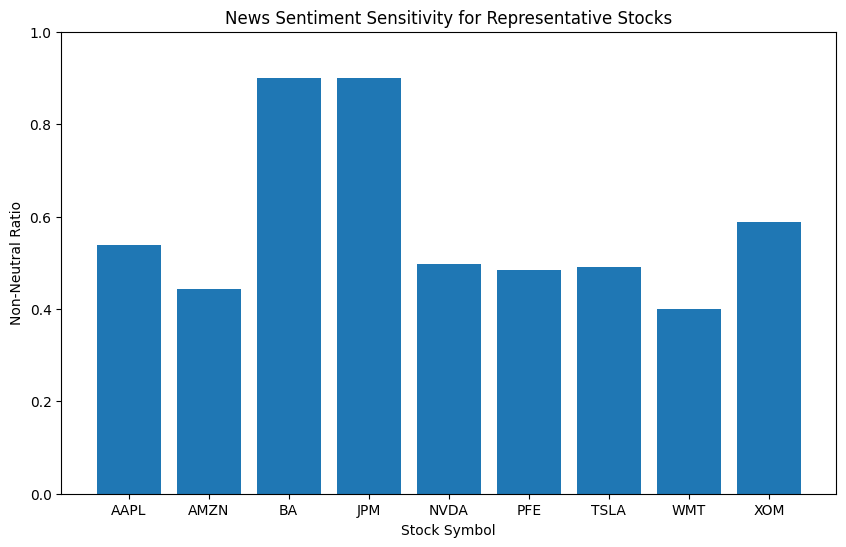


Sensitivity metrics aggregated by industry:
                            mean    median       std
industry                                            
Automotive              0.491200  0.491200       NaN
Consumer Discretionary  0.442446  0.442446       NaN
Consumer Staples        0.400000  0.400000       NaN
Energy                  0.587329  0.587329       NaN
Financials              0.900000  0.900000       NaN
Healthcare              0.484898  0.484898       NaN
Industrials             0.900000  0.900000       NaN
Technology              0.517118  0.517118  0.028704


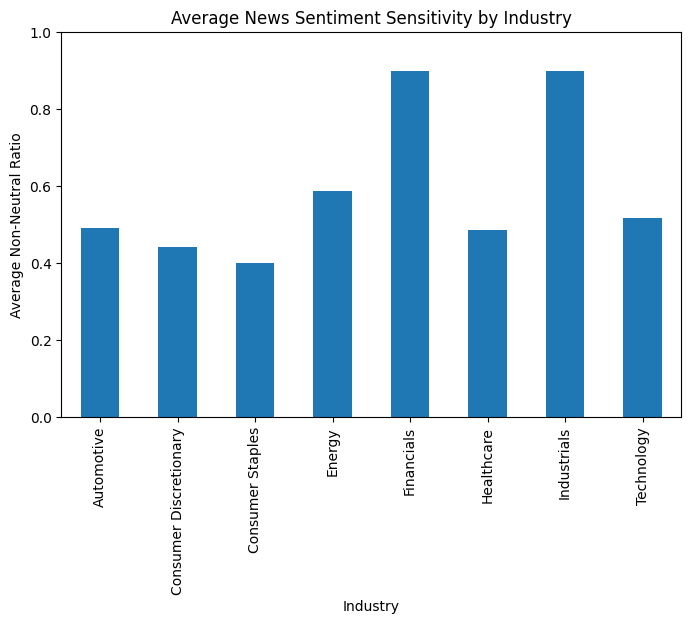

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


sector_map = {
    'AAPL': 'Technology',
    'TSLA': 'Automotive',
    'NVDA': 'Technology',
    'AMZN': 'Consumer Discretionary',
    'META': 'Technology',
    'JPM': 'Financials',
    'XOM': 'Energy',
    'PFE': 'Healthcare',
    'WMT': 'Consumer Staples',
    'BA': 'Industrials'
}

df = pd.read_csv('/content/labeled_financial_news_2M_clean.csv')


rep_stocks = list(sector_map.keys())
rep_df = df[df['stock_symbol'].isin(rep_stocks)]

# Group by stock and sentiment to get counts for each sentiment category
sentiment_counts = rep_df.groupby(['stock_symbol', 'sentiment']).size().unstack(fill_value=0)


sentiment_counts['non_neutral_ratio'] = sentiment_counts.drop(columns='neutral', errors='ignore').sum(axis=1) / sentiment_counts.sum(axis=1)

# Map each stock to its industry using the provided mapping.
sentiment_counts['industry'] = sentiment_counts.index.map(sector_map)

# Display the sentiment counts and calculated sensitivity metrics for each representative stock.
print("Sentiment counts and sensitivity metrics:")
print(sentiment_counts)


SENSITIVITY_THRESHOLD = 0.3
sensitive_stocks = sentiment_counts[sentiment_counts['non_neutral_ratio'] > SENSITIVITY_THRESHOLD]
print(f"\nStocks with greater than {SENSITIVITY_THRESHOLD*100:.0f}% non-neutral news:")
print(sensitive_stocks)


plt.figure(figsize=(10, 6))
plt.bar(sentiment_counts.index, sentiment_counts['non_neutral_ratio'])
plt.xlabel('Stock Symbol')
plt.ylabel('Non-Neutral Ratio')
plt.title('News Sentiment Sensitivity for Representative Stocks')
plt.ylim(0, 1)  # Since the ratio is between 0 and 1
plt.show()


industry_sensitivity = sentiment_counts.groupby('industry')['non_neutral_ratio'].agg(['mean', 'median', 'std'])
print("\nSensitivity metrics aggregated by industry:")
print(industry_sensitivity)


industry_sensitivity['mean'].plot(kind='bar', figsize=(8, 5))
plt.xlabel('Industry')
plt.ylabel('Average Non-Neutral Ratio')
plt.title('Average News Sentiment Sensitivity by Industry')
plt.ylim(0, 1)
plt.show()


Sentiment counts and sensitivity metrics:
sentiment     bearish  bullish  neutral  non_neutral_ratio  \
stock_symbol                                                 
AAPL              115      122      204           0.537415   
AMZN               56       67      155           0.442446   
BA                  7        2        1           0.900000   
JPM                 6        3        1           0.900000   
NVDA              675      888     1583           0.496821   
PFE               302      581      938           0.484898   
TSLA              399      522      954           0.491200   
WMT                 1        3        6           0.400000   
XOM               187      156      241           0.587329   

sentiment                   industry  
stock_symbol                          
AAPL                      Technology  
AMZN          Consumer Discretionary  
BA                       Industrials  
JPM                       Financials  
NVDA                      Technology  
PF

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=9 observations were given.
  return hypotest_fun_in(*args, **kwds)


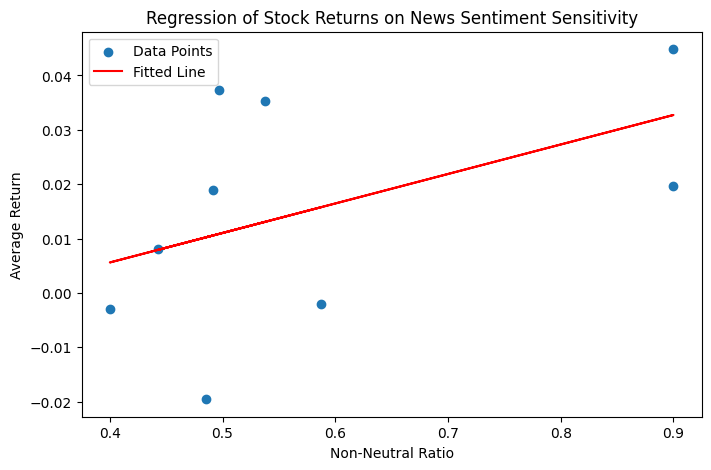

In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


sector_map = {
    'AAPL': 'Technology',
    'TSLA': 'Automotive',
    'NVDA': 'Technology',
    'AMZN': 'Consumer Discretionary',
    'META': 'Technology',
    'JPM': 'Financials',
    'XOM': 'Energy',
    'PFE': 'Healthcare',
    'WMT': 'Consumer Staples',
    'BA': 'Industrials'
}


df = pd.read_csv('/content/labeled_financial_news_2M_clean.csv')


rep_stocks = list(sector_map.keys())
rep_df = df[df['stock_symbol'].isin(rep_stocks)]


sentiment_counts = rep_df.groupby(['stock_symbol', 'sentiment']).size().unstack(fill_value=0)


sentiment_counts['non_neutral_ratio'] = sentiment_counts.drop(columns='neutral', errors='ignore').sum(axis=1) / sentiment_counts.sum(axis=1)

sentiment_counts['industry'] = sentiment_counts.index.map(sector_map)

print("Sentiment counts and sensitivity metrics:")
print(sentiment_counts)


np.random.seed(0)
sentiment_counts['average_return'] = np.random.randn(len(sentiment_counts)) * 0.02  # Synthetic data


X = sm.add_constant(sentiment_counts['non_neutral_ratio'])
y = sentiment_counts['average_return']


model = sm.OLS(y, X).fit()
print("\nRegression Model Summary:")
print(model.summary())


plt.figure(figsize=(8, 5))
plt.scatter(sentiment_counts['non_neutral_ratio'], sentiment_counts['average_return'], label='Data Points')
plt.plot(sentiment_counts['non_neutral_ratio'], model.predict(X), color='red', label='Fitted Line')
plt.xlabel('Non-Neutral Ratio')
plt.ylabel('Average Return')
plt.title('Regression of Stock Returns on News Sentiment Sensitivity')
plt.legend()
plt.show()
